# 快速运行 MMagic

```bash
pip install controlnet_aux diffusers click av einops face-alignment facexlib lpips mediapipe resize_right transformers accelerate
```

In [1]:
import sys
from pathlib import Path
root_dir = Path(".").resolve().parents[1]
sys.path.extend([
    f"{root_dir}/src",
    f"{root_dir}/tests"
])
from set_env import temp_dir
(temp_dir/"output").mkdir(exist_ok=True)

从文本生成图像：

```python
from mmagic.apis import MMagicInferencer
sd_inferencer = MMagicInferencer(model_name='stable_diffusion')
text_prompts = 'A panda is having dinner at KFC'
result_out_dir = 'output/sd_res.png'
sd_inferencer.infer(text=text_prompts, result_out_dir=result_out_dir)
```

MMagic 的超分辨率：

In [2]:
from mmagic.apis import MMagicInferencer
config = f'{temp_dir}/mmagic/configs/esrgan/esrgan_x4c64b23g32_1xb16-400k_div2k.py'
checkpoint = 'https://download.openmmlab.com/mmediting/restorers/esrgan/esrgan_x4c64b23g32_1x16_400k_div2k_20200508-f8ccaf3b.pth'
img_path = temp_dir/'mmagic/tests/data/image/lq/baboon_x4.png'
editor = MMagicInferencer('esrgan', model_config=config, model_ckpt=checkpoint)
result_out_dir = 'images/output.png'
output = editor.infer(img=img_path, result_out_dir=result_out_dir)

/media/pc/data/lxw/envs/anaconda3x/envs/xxx/lib/python3.12/site-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
/media/pc/data/lxw/ai/torch-book/tests/.temp/tasks/mmagic/mmagic/apis/mmagic_inferencer.py:186: UserWarning: esrgan's default config is overridden by /media/pc/data/lxw/ai/torch-book/tests/.temp/tasks/mmagic/configs/esrgan/esrgan_x4c64b23g32_1xb16-400k_div2k.py
  warnings.warn(
/media/pc/data/lxw/ai/torch-book/tests/.temp/tasks/mmagic/mmagic/apis/mmagic_inferencer.py:193: UserWarning: esrgan's default checkpoint is overridden by https://download.openmmlab.com/mmediting/restorers/esrgan/esrgan_x4c64b23g32_1x16_400k_div2k_20200508-f8ccaf3b.pth
  warnings.warn(
/media/pc/data/lxw/envs/anaconda3x/envs/xxx/lib/python3.12/site-packages/torchvision/model

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/restorers/esrgan/esrgan_x4c64b23g32_1x16_400k_div2k_20200508-f8ccaf3b.pth
11/21 13:52:38 - mmengine - WARNING - Failed to search registry with scope "mmagic" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmagic" is a correct scope, or whether the registry is initialized.
11/21 13:52:38 - mmengine - WARNING - Cannot find key 'gt_img' in data sample.


/media/pc/data/lxw/envs/anaconda3x/envs/xxx/lib/python3.12/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


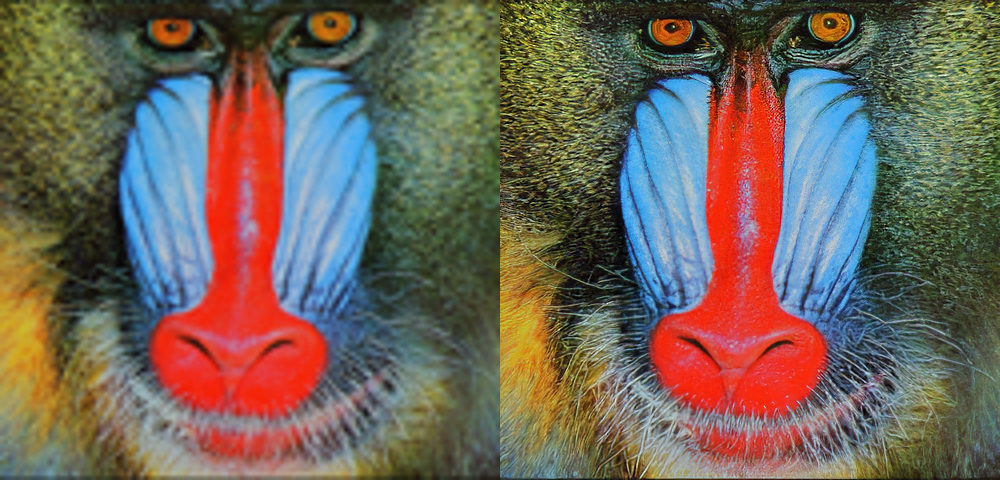

In [3]:
from PIL import Image
import numpy as np
im1 = Image.open(img_path)
im2 = Image.open(result_out_dir)
Image.fromarray(np.concatenate([im1.resize(im2.size), im2], axis=1))

In [13]:
!python {temp_dir}/mmagic/tools/analysis_tools/print_config.py {config}

Config:
custom_hooks = [
    dict(interval=1, type='BasicVisualizationHook'),
]
data_root = 'data'
dataset_type = 'BasicImageDataset'
default_hooks = dict(
    checkpoint=dict(
        by_epoch=False,
        interval=5000,
        max_keep_ckpts=10,
        out_dir='./work_dirs/',
        rule='greater',
        save_best='PSNR',
        save_optimizer=True,
        type='CheckpointHook'),
    logger=dict(interval=100, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    timer=dict(type='IterTimerHook'))
default_scope = 'mmagic'
div2k_data_root = 'data/DIV2K'
div2k_dataloader = dict(
    dataset=dict(
        ann_file='meta_info_DIV2K100sub_GT.txt',
        data_prefix=dict(
            gt='DIV2K_train_HR_sub', img='DIV2K_train_LR_bicubic/X4_sub'),
        data_root='data/DIV2K',
        metainfo=dict(dataset_type='div2k', task_name='sisr'),
        pipeline=[
            dict(
                channel_order='rg